# dividir el dataset en train y test

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [22]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**creo manualmente el conjunto train / test**

In [23]:
a = np.random.randn(len(data))
check = (a < 0.8)
train = data[check]
test = data[~check]
print("verificando: train={}, test={}, total data={}".format(len(train), len(test), len(data)))

verificando: train=160, test=40, total data=200


**grafico la distribución normal, por las dudas**

(array([ 7.,  8., 28., 30., 31., 44., 22., 21.,  5.,  4.]),
 array([-2.52304522, -2.00184063, -1.48063604, -0.95943146, -0.43822687,
         0.08297772,  0.60418231,  1.12538689,  1.64659148,  2.16779607,
         2.68900066]),
 <a list of 10 Patch objects>)

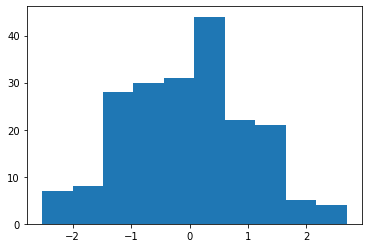

In [24]:
plt.hist(a)

**creo el primer modelo, con los train**

el modelo es muy bueno, mantiene los parámetros de la regresión del ejercicio anterior

In [25]:
lm = smf.ols(formula='Sales ~ TV+Radio', data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     717.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.03e-79
Time:                        23:30:43   Log-Likelihood:                -302.09
No. Observations:                 160   AIC:                             610.2
Df Residuals:                     157   BIC:                             619.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8969      0.316      9.174      0.000       2.273       3.521
TV             0.0469      0.002     30.069      0.000       0.044       0.050
Radio          0.1841      0.009     20.658      0.000       0.166       0.202
==============================================================================
Omnibus:                       58.417   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.521
Skew:                          -1.438   Prob(JB):                     1.04e-39
Kurtosis:                       7.320   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### nos queda:
## <font color='green'>y = 3.4194 + 0.0437 * TV + 0.1802 * Radio</font>

# Validación del modelo: utilizar el conjunto de testing

In [26]:
sales_pred = lm.predict(test)

In [27]:
SSD = np.sum((test['Sales'] - sales_pred)**2)
SSD

151.23223854315506

In [28]:
#desviación estándar de los residuos
RSE = np.sqrt(SSD/(len(test)-2-1))
RSE

2.0217214937927652

In [29]:
sales_mean = np.mean(test['Sales'])
error = RSE/sales_mean
print("el modelo no puede explicar el {} % del error.".format(np.around(error*100,4)))

el modelo no puede explicar el 13.42 % del error.


**conclusión: el error de 0.11 es el mismo que obtuvimos con el ejercicio de la regresión lineal múltiple**

(array([2., 1., 3., 2., 2., 5., 4., 7., 8., 6.]),
 array([-5.10587673, -4.35347671, -3.60107668, -2.84867666, -2.09627663,
        -1.3438766 , -0.59147658,  0.16092345,  0.91332348,  1.6657235 ,
         2.41812353]),
 <a list of 10 Patch objects>)

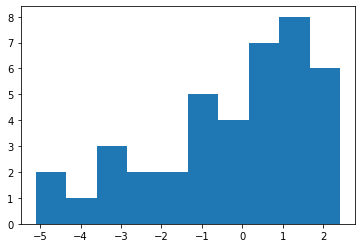

In [30]:
res=(test['Sales'] - sales_pred)
plt.hist(res)

# Resumen de todos los modelos:
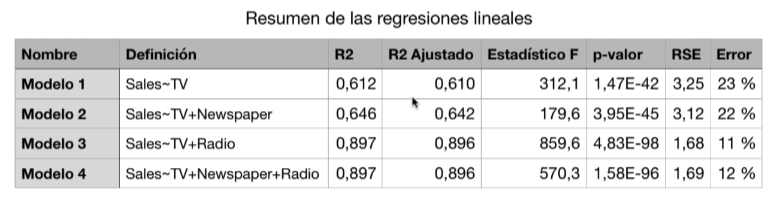